<a href="https://colab.research.google.com/github/icy-fyr/Air-passenger/blob/main/AML__Term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('/content/cencus income.csv')
df

,Age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours/week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [123]:
df.describe()

,Age,fnlwgt,education-num,capital gain,capital loss,hours/week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [124]:
df.shape

(32561, 15)

**1.1 Target variable**

In [125]:
#INCOME
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [126]:
df['income'].replace([' <=50K', ' >50K'],[0,1], inplace=True) # replace for 0 and 1
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [127]:
df['income'].unique()

array([0, 1])

0    24720
1     7841
Name: income, dtype: int64

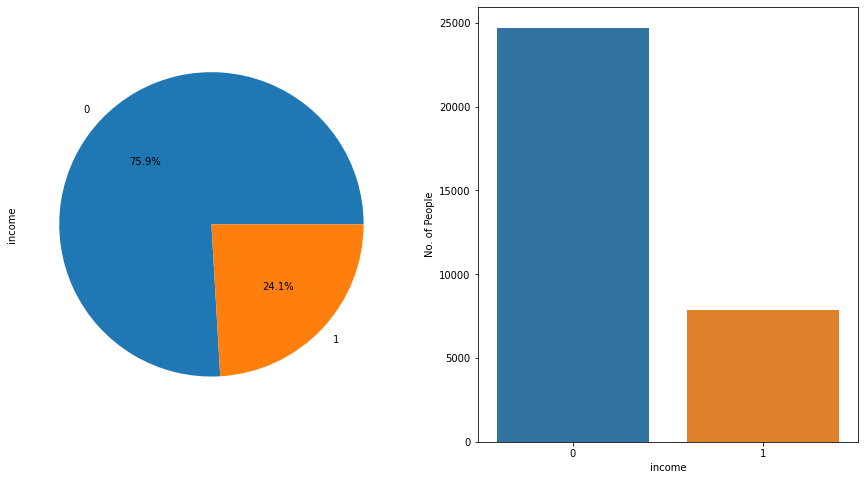

In [128]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='income',data=df)
plt.ylabel('No. of People')
df['income'].value_counts()

its highly an imbalanced data set

***1.2 Categorical variables ***


WORKCLASS

In [129]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

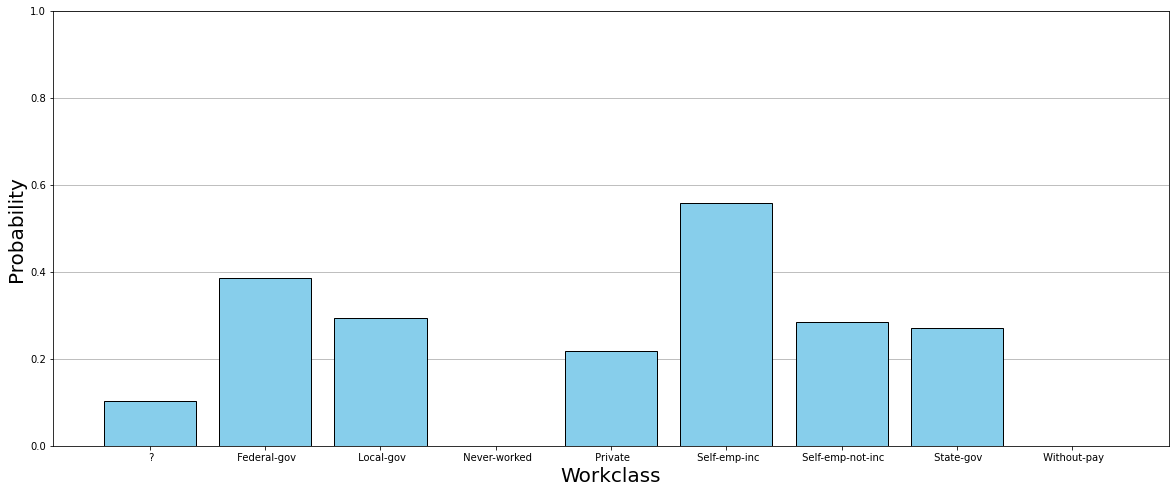

In [130]:
# probability of belonging to the group with the highest income
workclass_income = df.groupby('workclass')['income'].mean() # there is correlation as spected

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(20, 8))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(workclass_income.index.astype(str), workclass_income,
       color = 'SkyBlue' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

Education

In [131]:
df['education'].unique() 


array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

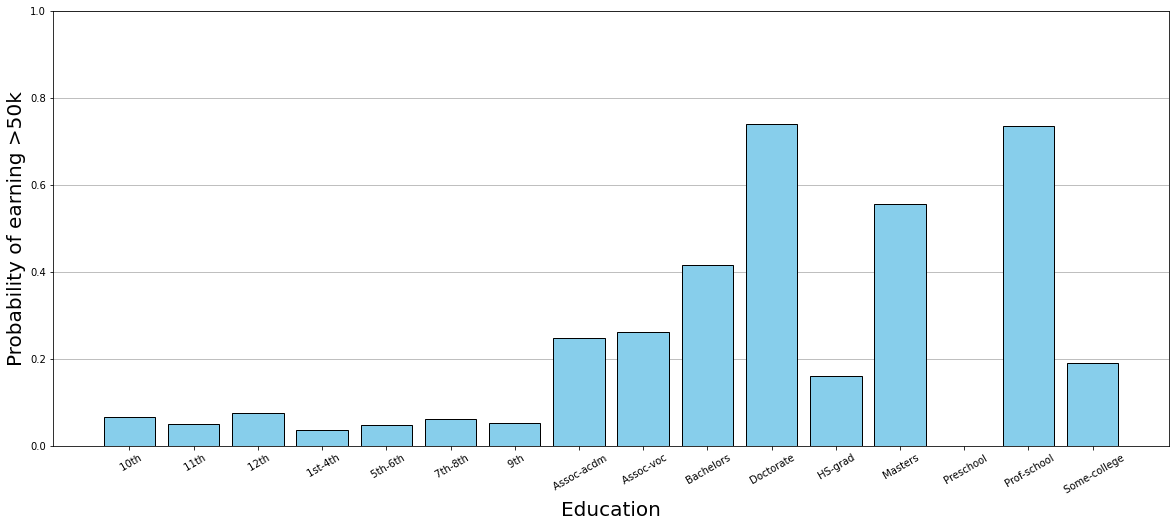

In [132]:
# probability of belonging to the group with the highest income
education_income = df.groupby('education')['income'].mean() # there is correlation as spected

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.xticks(rotation=30) # rotate axis text
plt.bar(education_income.index.astype(str), education_income,
       color = 'SkyBlue', edgecolor='black' )
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Education', size=20)
plt.grid(axis='y')

Marital.status


In [133]:
df['marital status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

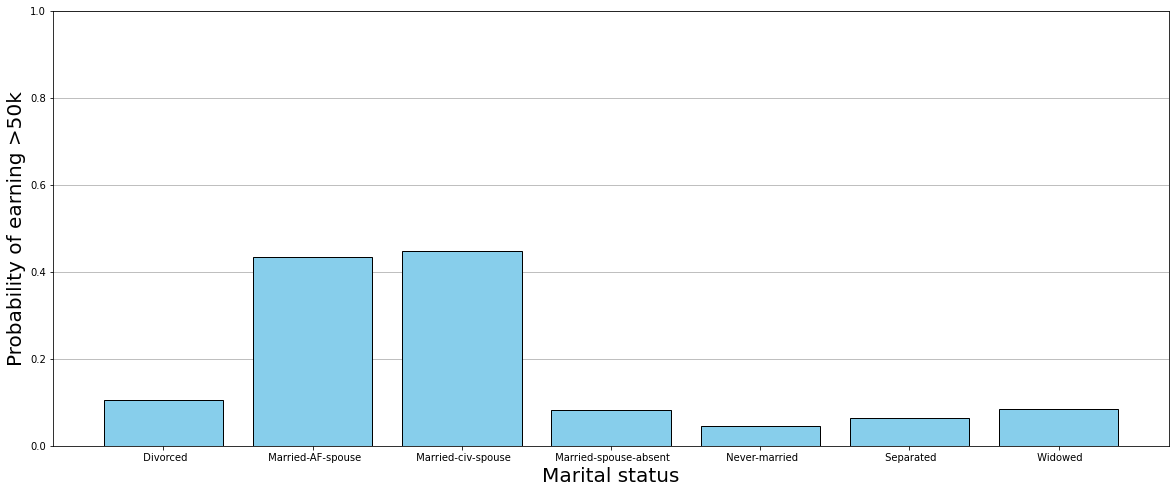

In [134]:
marital_income = df.groupby('marital status')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(marital_income.index.astype(str), marital_income,
       color = 'SkyBlue', edgecolor='black' )
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Marital status', size=20)
plt.grid(axis='y')

Occupation


In [135]:
df['occupation'].value_counts() 


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [136]:
# Show null values in common
work_ocupation = df.loc[df['workclass'] == df['occupation'],'workclass']
work_ocupation.value_counts()

 ?    1836
Name: workclass, dtype: int64

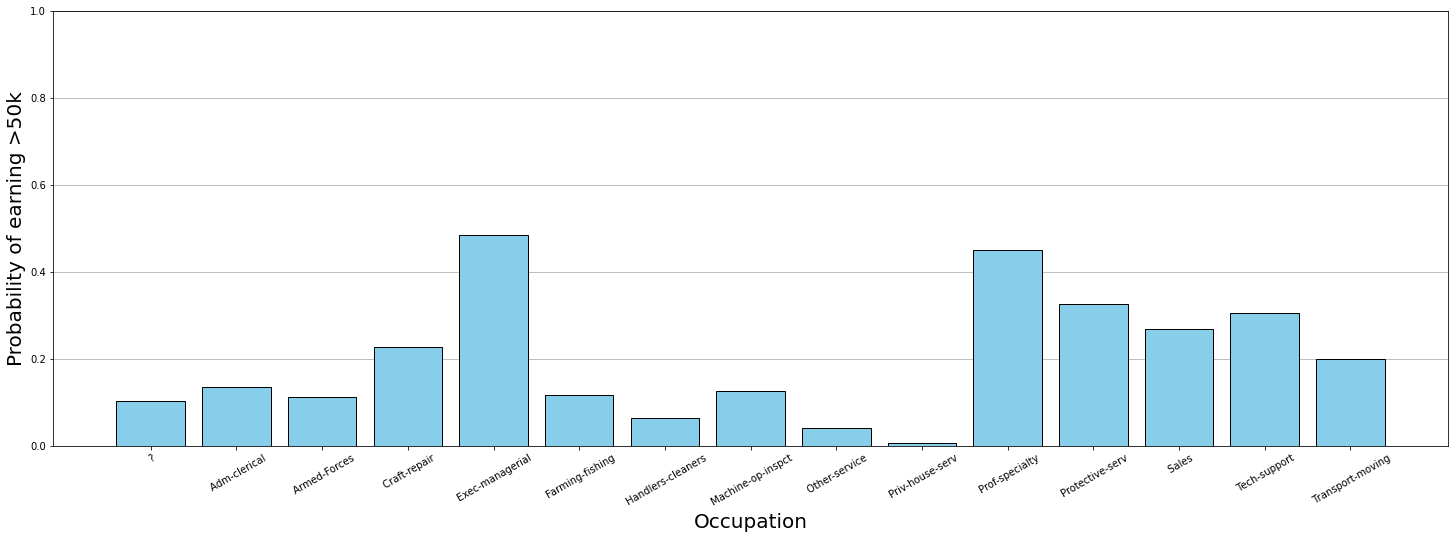

In [137]:
# probability of belonging to the group with the highest income
occupation_income = df.groupby('occupation')['income'].mean()

plt.figure(figsize=(25, 8))
plt.ylim(0,1)
plt.xticks(rotation=30) # rotate axis text
plt.bar(occupation_income.index.astype(str), occupation_income,
       color = 'SkyBlue', edgecolor='black' )
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Occupation', size=20)
plt.grid(axis='y')

Relationship

In [138]:
df['relationship'].value_counts() 


 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

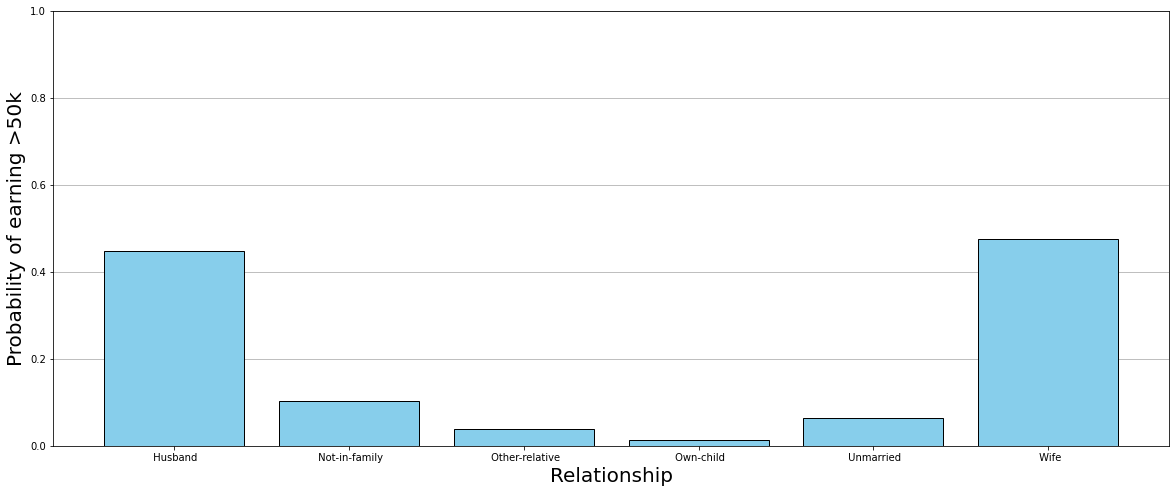

In [139]:
# probability of belonging to the group with the highest income
relationship_income = df.groupby('relationship')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(relationship_income.index.astype(str), relationship_income,
       color = 'SkyBlue', edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Relationship', size=20)
plt.grid(axis='y')

Race

In [140]:
df['race'].value_counts()


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

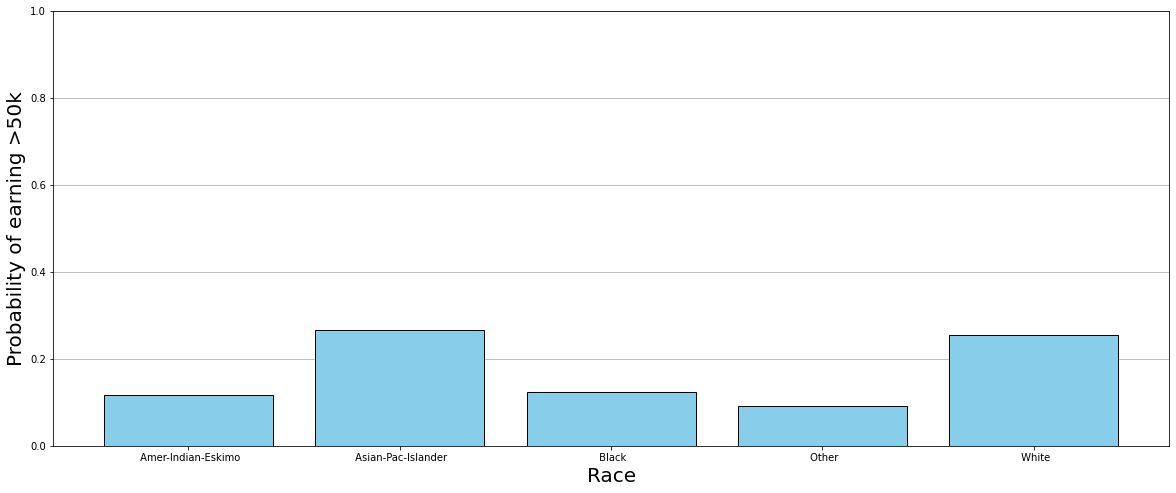

In [141]:
race_income = df.groupby('race')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(race_income.index.astype(str), race_income,
       color = 'SkyBlue', edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Race', size=20)
plt.grid(axis='y')

Sex

In [142]:
df['sex'].value_counts()


 Male      21790
 Female    10771
Name: sex, dtype: int64

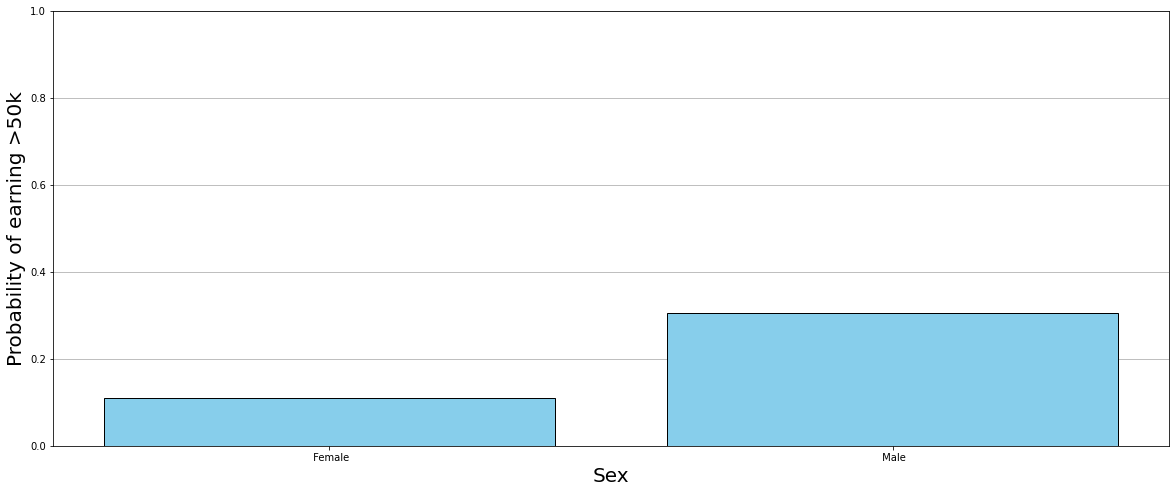

In [143]:
sex_income = df.groupby('sex')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(sex_income.index.astype(str), sex_income,
       color = 'SkyBlue', edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Sex', size=20)
plt.grid(axis='y')

native.country¶


In [144]:
df['native country'].unique() 


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [145]:
# Show number of missing values
df.loc[df['native country'] == '?', 'native country'].count() 


0

In [146]:
# Show if missing values have something to do with occupation missing data
df.loc[df['native country'] == 'occupation','occupation' ].count()


0

In [147]:
# Show if missing values have something to do with workclass missing data
df.loc[df['native country'] == 'workclass','workclass' ].count()

0

***1.3 Continous variables ***


1.3.1 Correlation matrix 


In [148]:
df.info() # Show continoues variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  hours/week      32561 non-null  int64 
 13  native country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


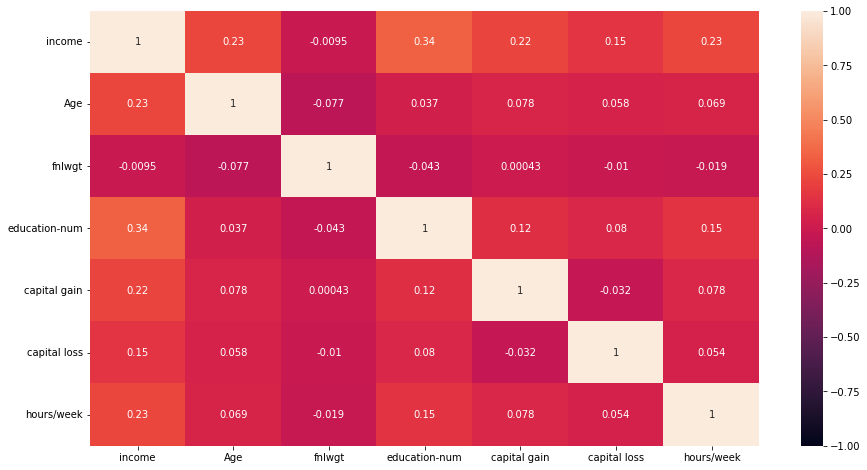

In [149]:
# Group all continous variables 
df_continous = df[['income', 'Age', 'fnlwgt', 'education-num', 'capital gain', 'capital loss', 'hours/week']]
# Correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(data=df_continous.corr(), annot=True, vmin=-1, vmax=1)

As we see fnlwgt does not have a high correlation with income so we will drop it.



Age

In [150]:
df['Age'].unique()


array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

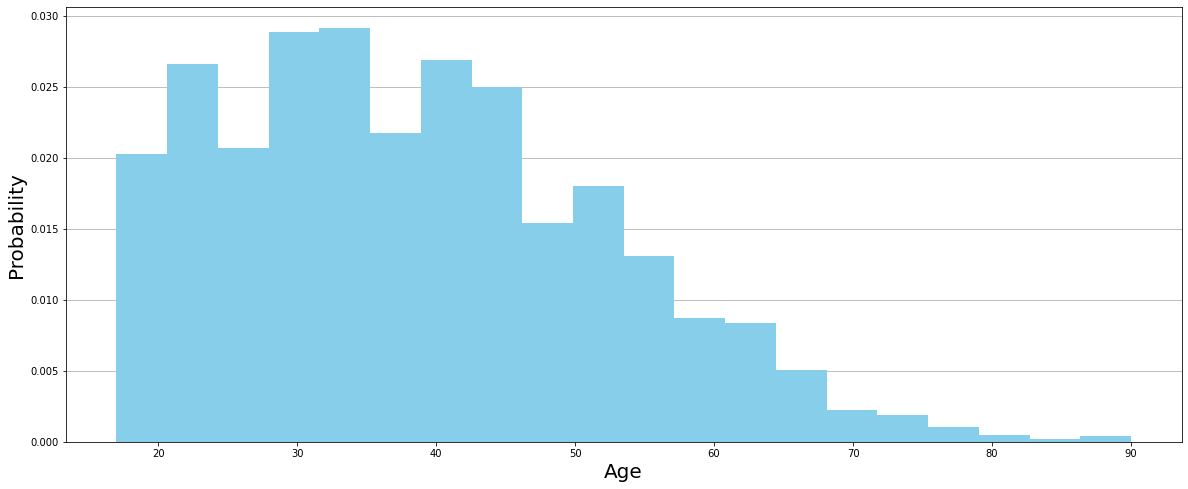

In [151]:
# plot histogram
plt.figure(figsize=(20, 8))
plt.hist(df['Age'],density=True, bins=20, color = 'SkyBlue')
plt.ylabel('Probability', size=20)
plt.xlabel('Age', size=20)
plt.grid(axis='y')

In [152]:
# Show average age by income
df.groupby("income")["Age"].mean() 

income
0    36.783738
1    44.249841
Name: Age, dtype: float64

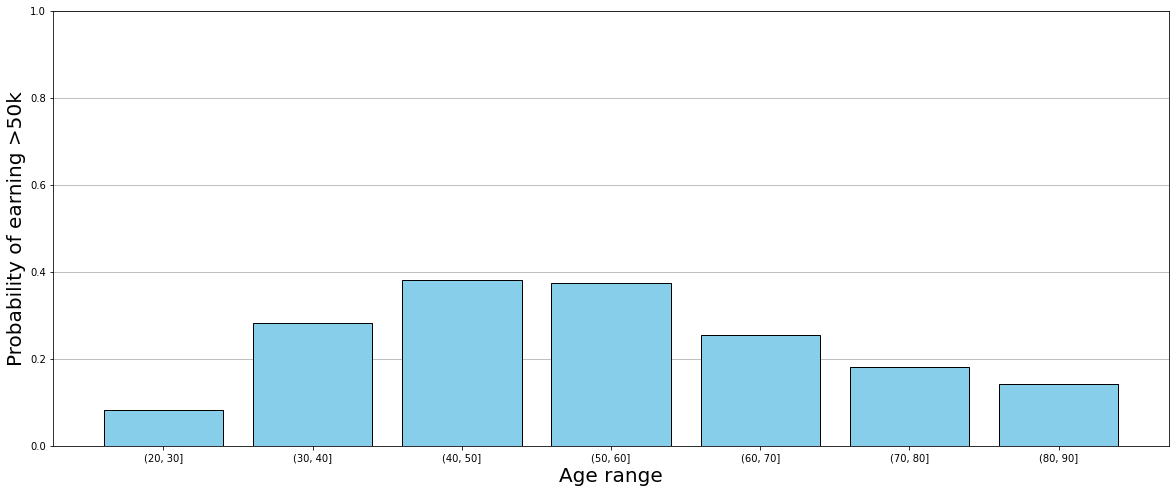

In [153]:
# divide age into groups
age_range = pd.cut(df['Age'], bins = [20,30,40,50,60,70,80,90])

# show probability of belonging to the group with the highest income
age_income = df.groupby(age_range)['income'].mean()

# barplot showing probability of belonging to the group with the highest income per age range
plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(age_income.index.astype(str), age_income, color = 'SkyBlue',
       edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Age range', size=20)
plt.grid(axis='y')

fnlwgt

In [154]:
df.loc[df['fnlwgt'] == '?'] 


,Age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours/week,native country,income


education.num¶


In [155]:
df['education-num'].value_counts()


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [156]:
df['education'].value_counts() # we can see that it has the same number of values

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

capital gain¶


In [157]:
df['capital gain'].unique()


array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

capital.loss


In [158]:
df['capital loss'].unique()


array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

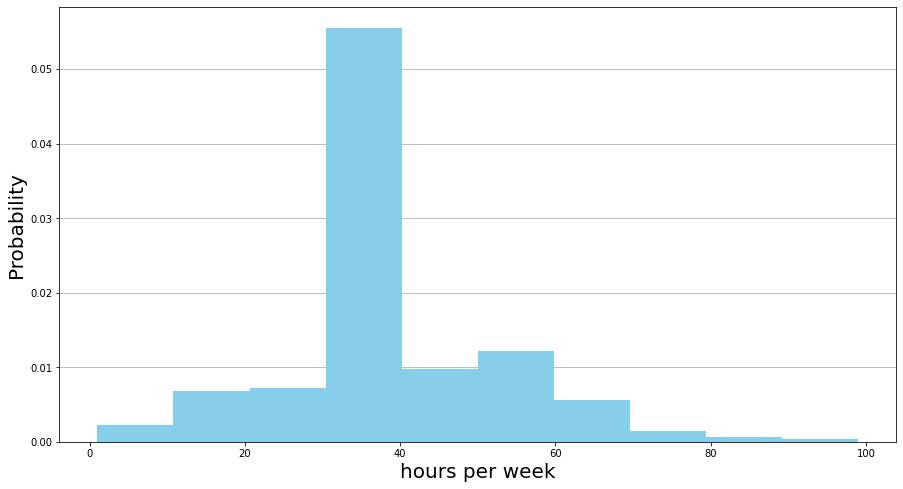

In [159]:
# plot histogram
plt.figure(figsize=(15, 8))
plt.hist(df['hours/week'],density=True, bins=10,  color = 'SkyBlue')
plt.ylabel('Probability', size=20)
plt.xlabel('hours per week', size=20)
plt.grid(axis='y')


****2. Cleaning data ****


2.1 Drop useless variables ¶


In [160]:
df.head()

,Age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours/week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [161]:
df = df.drop('fnlwgt', axis=1)
df = df.drop('education-num', axis=1)
df.shape

(32561, 13)

2.2 Deal with missing data ¶


In [163]:
df = df.loc[ (df['workclass'] != '?') & (df['occupation'] != '?') & (df['native country']!= '?')]
df.shape

(32561, 13)

**3. Split data and get dummies ¶**


In [164]:
# Split into dependend and independent variables
X = df.drop('income', axis=1)
y = df['income']

In [168]:
# Split X into continous variables and categorical variables

X_continous  = X[['Age', 'capital gain', 'capital loss', 'hours/week']]

X_categorical = X[['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race',
                   'sex', 'native country']]

In [169]:
# Get the dummies
X_encoded = pd.get_dummies(X_categorical)
# Concatenate both continous and encoded sets:
X = pd.concat([X_continous, X_encoded],axis=1)
X

,Age,capital gain,capital loss,hours/week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital status_ Divorced,marital status_ Married-AF-spouse,marital status_ Married-civ-spouse,marital status_ Married-spouse-absent,marital status_ Never-married,marital status_ Separated,marital status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native country_ Canada,native country_ China,native country_ Columbia,native country_ Cuba,native country_ Dominican-Republic,native country_ Ecuador,native country_ El-Salvador,native country_ England,native country_ France,native country_ Germany,native country_ Greece,native country_ Guatemala,native country_ Haiti,native country_ Holand-Netherlands,native country_ Honduras,native country_ Hong,native country_ Hungary,native country_ India,native country_ Iran,native country_ Ireland,native country_ Italy,native country_ Jamaica,native country_ Japan,native country_ Laos,native country_ Mexico,native country_ Nicaragua,native country_ Outlying-US(Guam-USVI-etc),native country_ Peru,native country_ Philippines,native country_ Poland,native country_ Portugal,native country_ Puerto-Rico,native country_ Scotland,native country_ South,native country_ Taiwan,native country_ Thailand,native country_ Trinadad&Tobago,native country_ United-States,native country_ Vietnam,native country_ Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
